### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

### Reading DataSet

In [2]:
# loading the data from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [3]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [4]:
# loading the data to a data frame
dataset = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [5]:
# print the first 5 rows of the dataframe
dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# adding the 'target' column to the data frame
dataset['label'] = breast_cancer_dataset.target

In [7]:
# print last 5 rows of the dataframe
dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


### Exploratory Data Analysis (EDA)

In [8]:
dataset.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'label'],
      dtype='object')

In [9]:
dataset.shape

(569, 31)

In [10]:
# Column Types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
# Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution
dataset.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [12]:
# To check the number of unique values in each column
num_unique = dataset.nunique()
num_unique

mean radius                456
mean texture               479
mean perimeter             522
mean area                  539
mean smoothness            474
mean compactness           537
mean concavity             537
mean concave points        542
mean symmetry              432
mean fractal dimension     499
radius error               540
texture error              519
perimeter error            533
area error                 528
smoothness error           547
compactness error          541
concavity error            533
concave points error       507
symmetry error             498
fractal dimension error    545
worst radius               457
worst texture              511
worst perimeter            514
worst area                 544
worst smoothness           411
worst compactness          529
worst concavity            539
worst concave points       492
worst symmetry             500
worst fractal dimension    535
label                        2
dtype: int64

In [13]:
# count the number of duplicate rows
dataset.duplicated().sum()

0

In [14]:
# count the number of missing values (NaN values) in each column.
dataset.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [15]:
# Calculate the correlation matrix
dataset.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [16]:
# checking the distribution of Target Varibale
dataset['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

#### Feature Engineering

In [17]:
# drop name and tickets
data = dataset.drop(['mean area','mean perimeter'], axis=1)

In [18]:
# Accessing the column names
column_names = data.columns
print(column_names)

Index(['mean radius', 'mean texture', 'mean smoothness', 'mean compactness',
       'mean concavity', 'mean concave points', 'mean symmetry',
       'mean fractal dimension', 'radius error', 'texture error',
       'perimeter error', 'area error', 'smoothness error',
       'compactness error', 'concavity error', 'concave points error',
       'symmetry error', 'fractal dimension error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension', 'label'],
      dtype='object')


#### Visualization

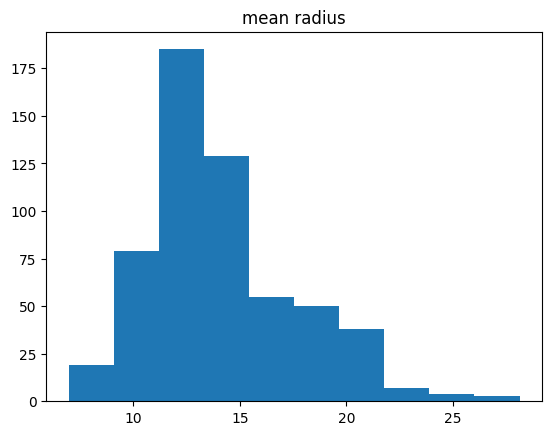

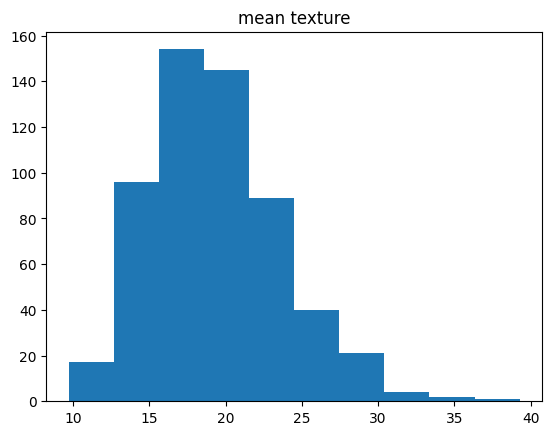

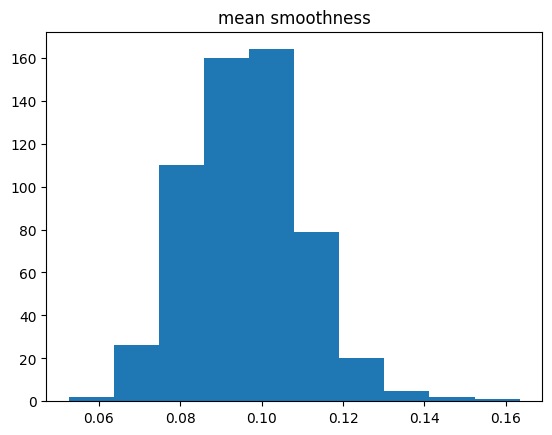

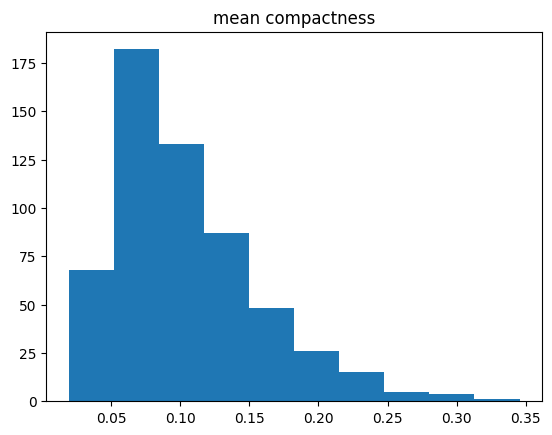

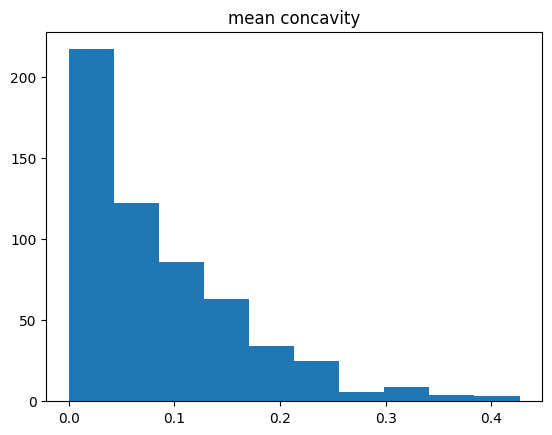

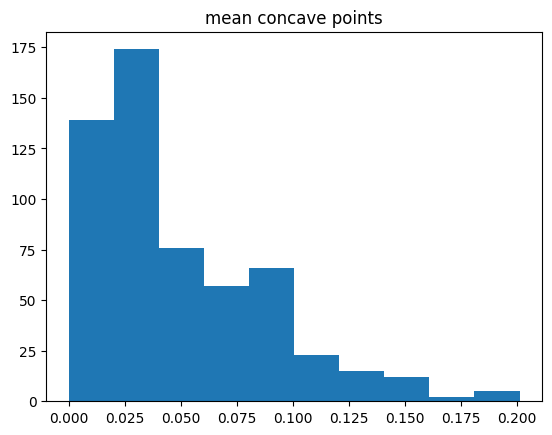

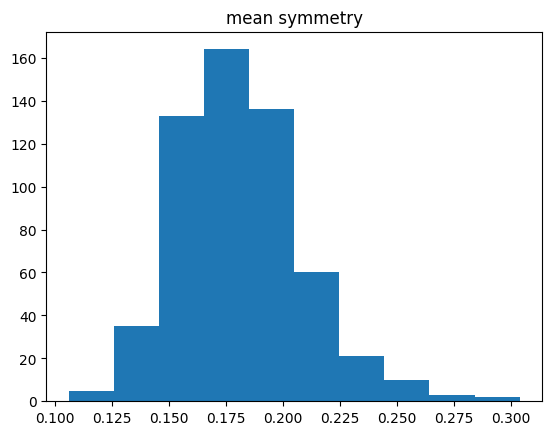

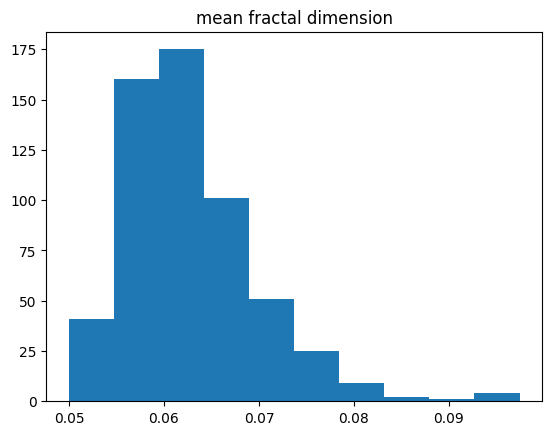

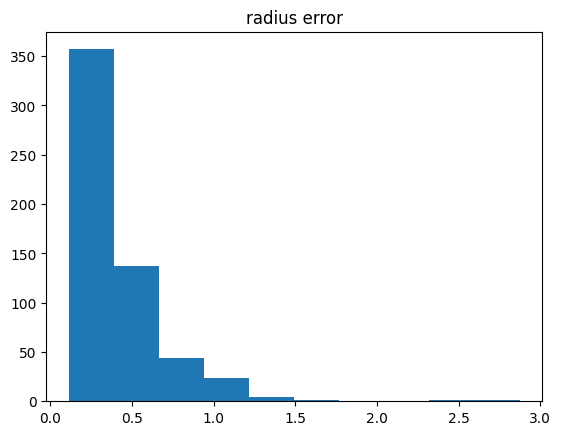

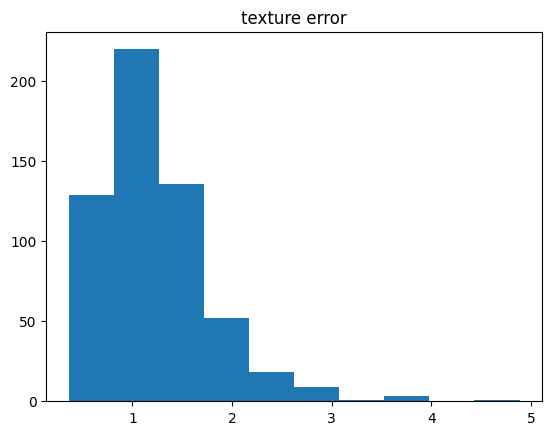

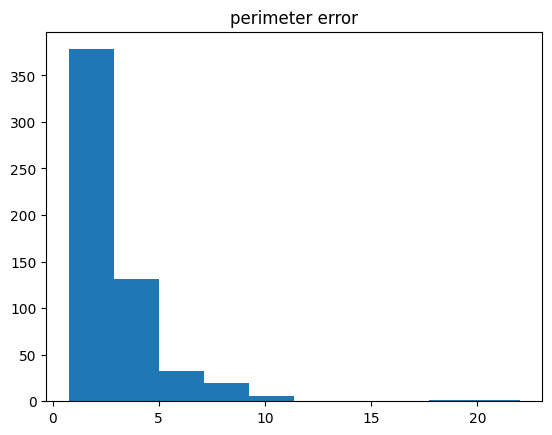

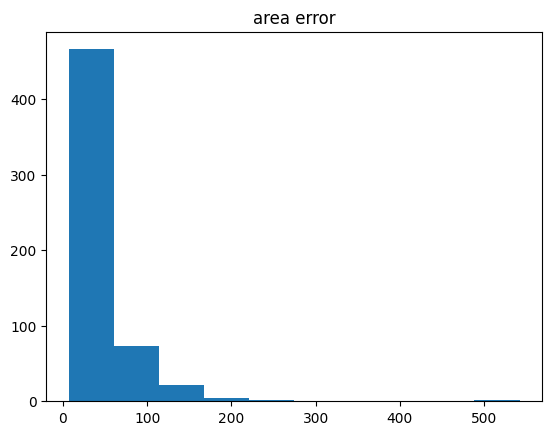

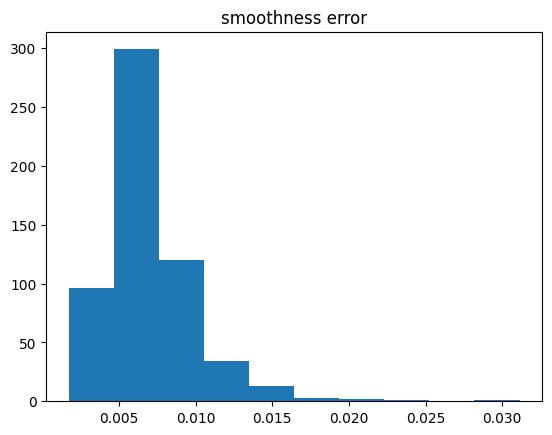

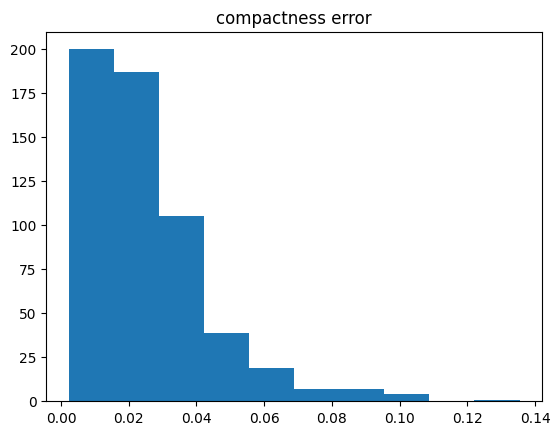

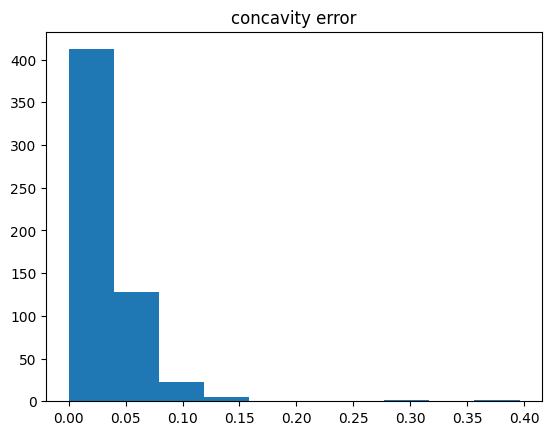

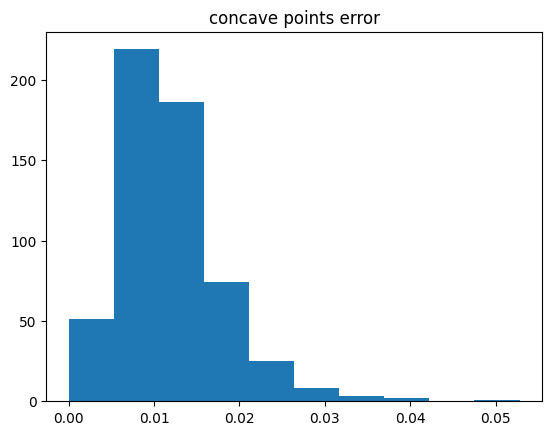

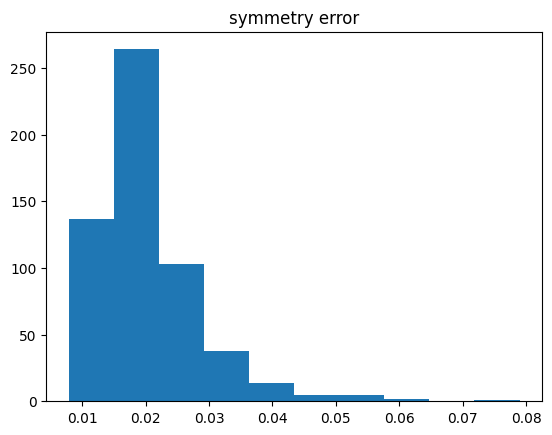

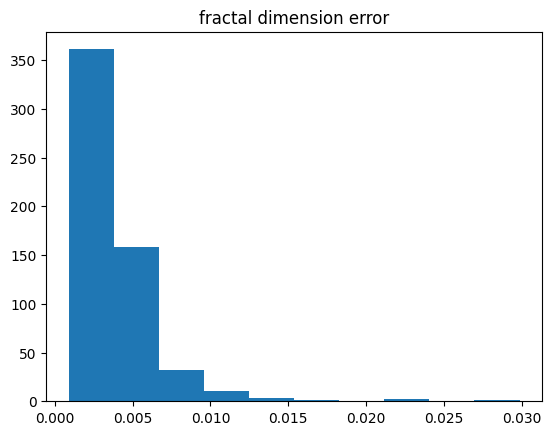

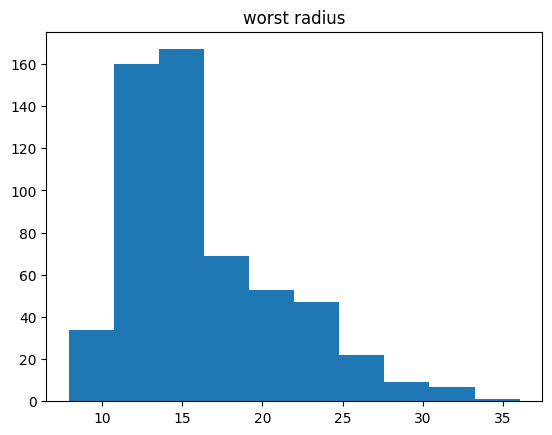

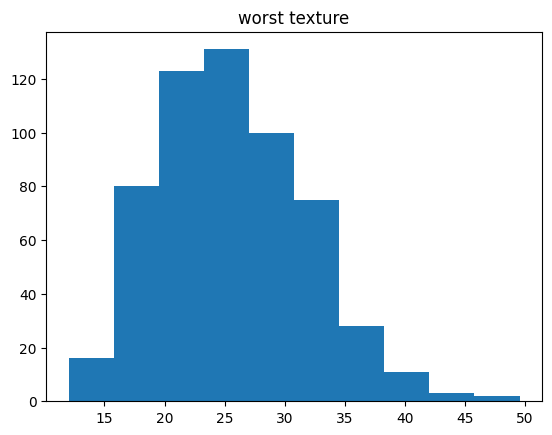

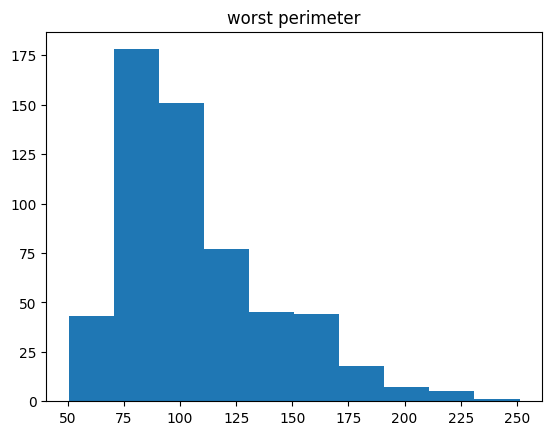

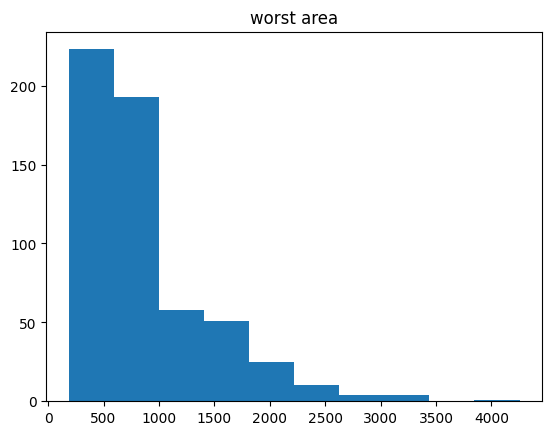

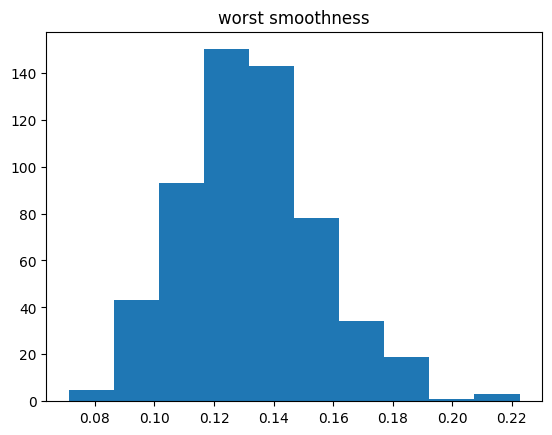

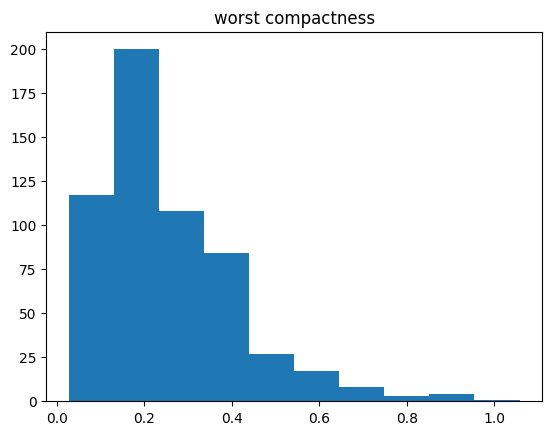

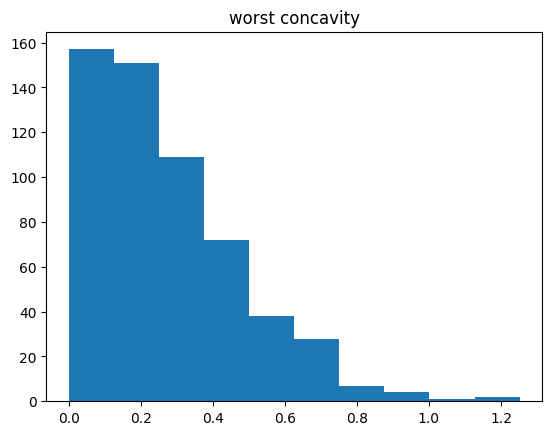

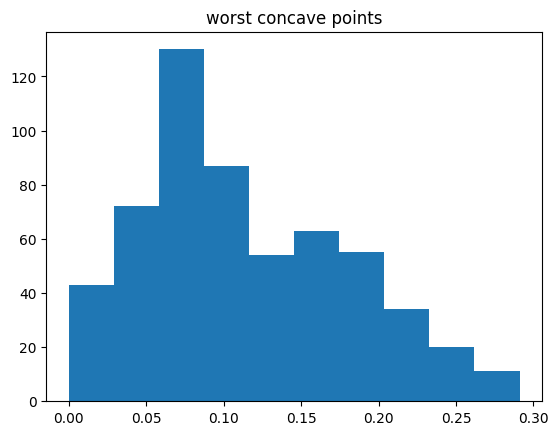

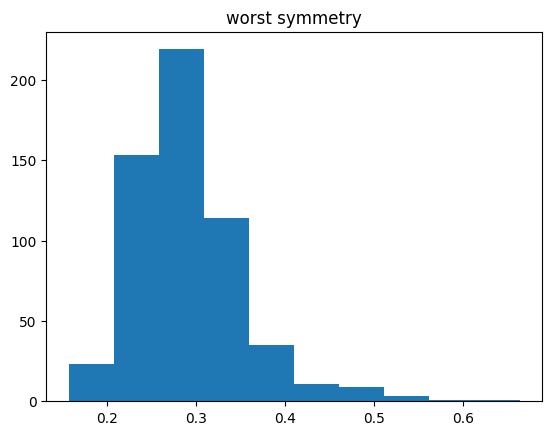

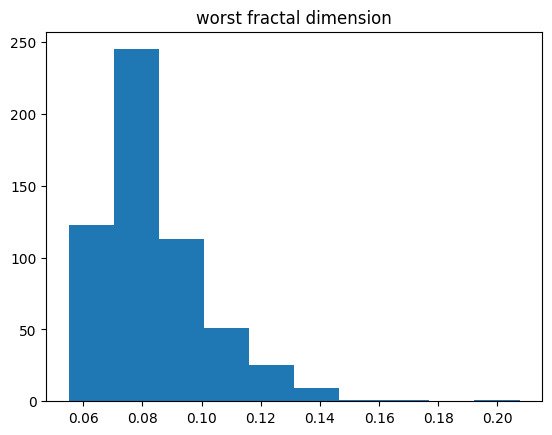

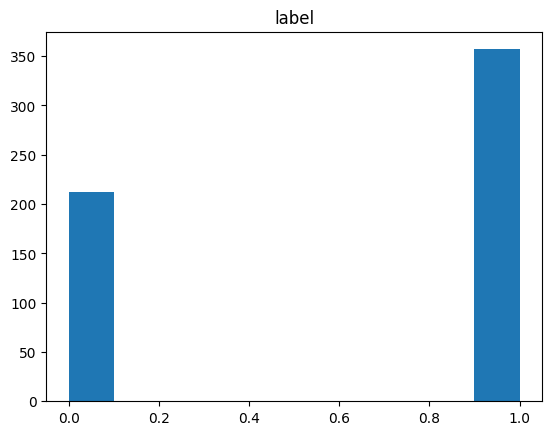

In [19]:
# histogram
for col in column_names:
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(data[col]):
        # If the column is numeric, create a histogram using matplotlib
        plt.hist(data[col])
        plt.title(col)
        plt.show()

<Axes: >

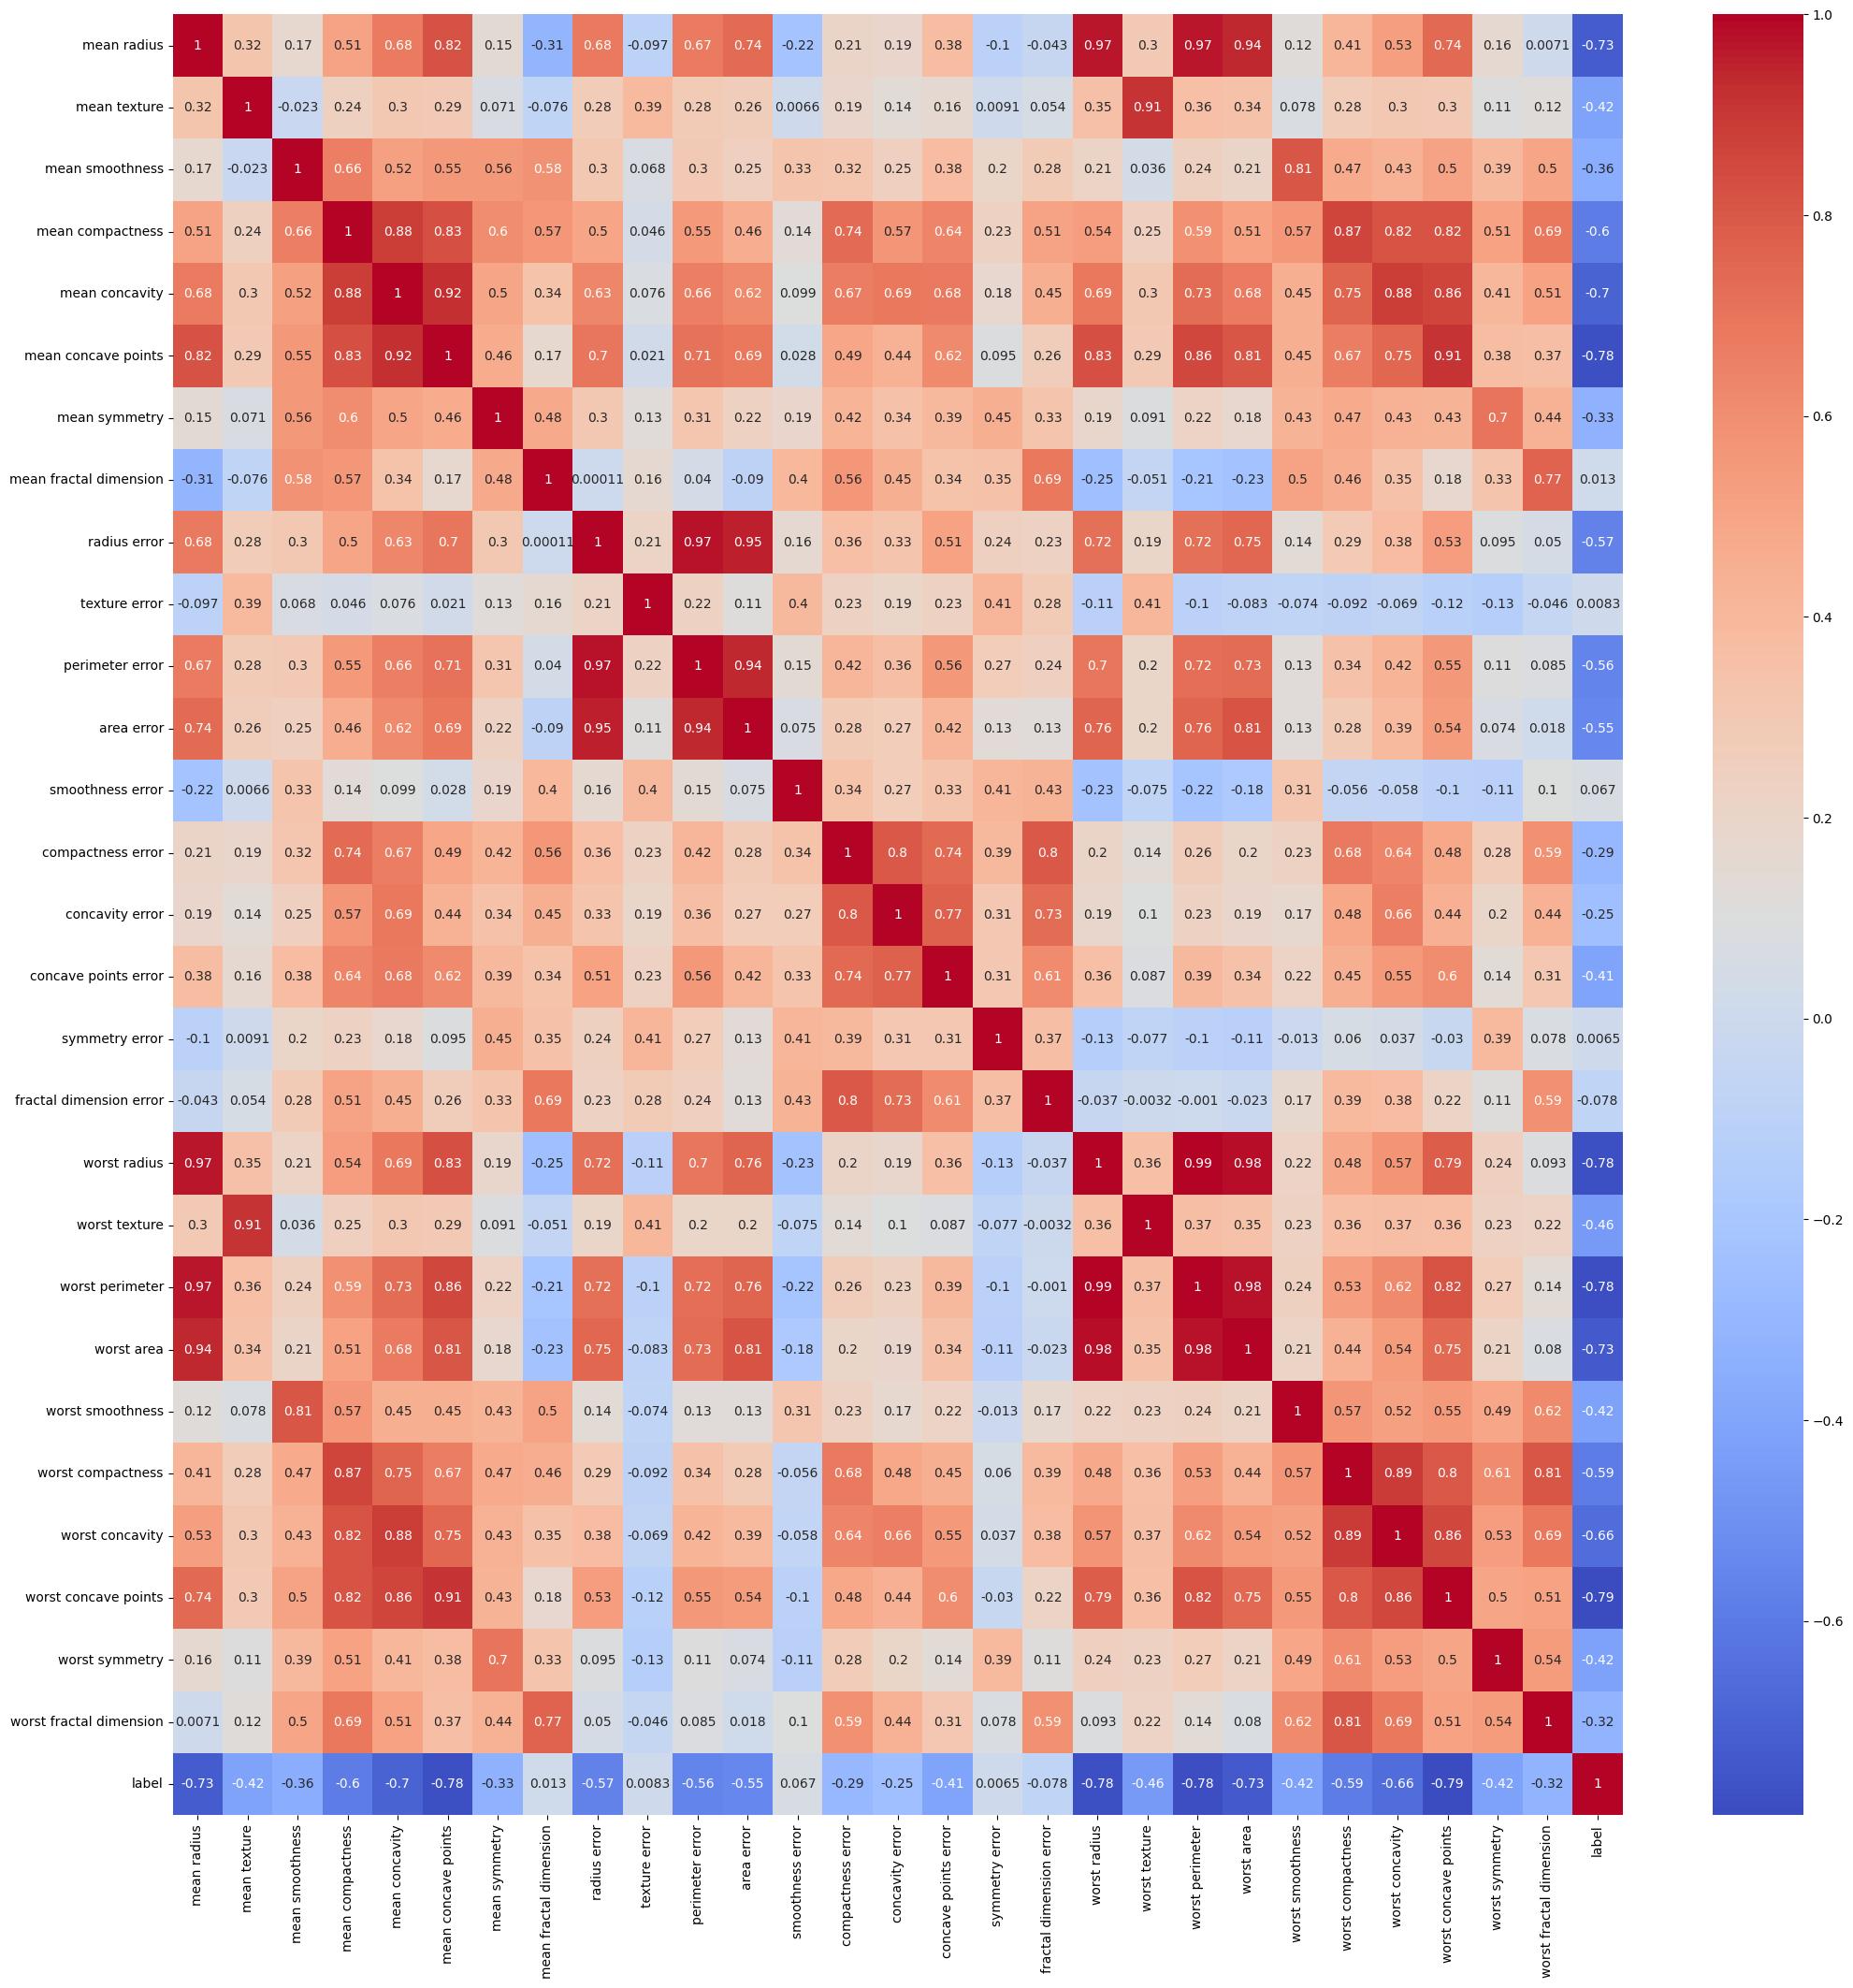

In [20]:
# Generate a correlation matrix
corr_matrix = data.corr()

# Create a larger figure
plt.figure(figsize=(25, 25))

# Create the heatmap with annotations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

### Separating the features and target

In [21]:
x = data.drop(columns='label', axis=1)
y = data['label']

In [22]:
print(x)

     mean radius  mean texture  mean smoothness  mean compactness  \
0          17.99         10.38          0.11840           0.27760   
1          20.57         17.77          0.08474           0.07864   
2          19.69         21.25          0.10960           0.15990   
3          11.42         20.38          0.14250           0.28390   
4          20.29         14.34          0.10030           0.13280   
..           ...           ...              ...               ...   
564        21.56         22.39          0.11100           0.11590   
565        20.13         28.25          0.09780           0.10340   
566        16.60         28.08          0.08455           0.10230   
567        20.60         29.33          0.11780           0.27700   
568         7.76         24.54          0.05263           0.04362   

     mean concavity  mean concave points  mean symmetry  \
0           0.30010              0.14710         0.2419   
1           0.08690              0.07017         0.18

In [23]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


### Splitting the data into training data & Testing data

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2)

In [25]:
print(x.shape, x_train.shape, x_test.shape)

(569, 28) (455, 28) (114, 28)


### Standardize the data

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

### **Building the Neural Network**

In [28]:
# setting up the layers of Neural Network
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,)),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])

In [29]:
# compiling the Neural Network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
#trainning the Neural Network
history = model.fit(x_train_std, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 [==============================] - 2s 46ms/step - loss: 0.6251 - accuracy: 0.6968 - val_loss: 0.4722 - val_accuracy: 0.7391
Epoch 2/10
13/13 [==============================] - 0s 12ms/step - loss: 0.3995 - accuracy: 0.8509 - val_loss: 0.3226 - val_accuracy: 0.8913
Epoch 3/10
13/13 [==============================] - 0s 12ms/step - loss: 0.2872 - accuracy: 0.9095 - val_loss: 0.2532 - val_accuracy: 0.9130
Epoch 4/10
13/13 [==============================] - 0s 12ms/step - loss: 0.2332 - accuracy: 0.9218 - val_loss: 0.2150 - val_accuracy: 0.9565
Epoch 5/10
13/13 [==============================] - 0s 11ms/step - loss: 0.1991 - accuracy: 0.9291 - val_loss: 0.1898 - val_accuracy: 0.9565
Epoch 6/10
13/13 [==============================] - 0s 13ms/step - loss: 0.1748 - accuracy: 0.9315 - val_loss: 0.1716 - val_accuracy: 0.9565
Epoch 7/10
13/13 [==============================] - 0s 12ms/step - loss: 0.1571 - accuracy: 0.9340 - val_loss: 0.1562 - val_accuracy: 0.9565
Epoch 8/10
13

#### Visualizing accuracy and loss

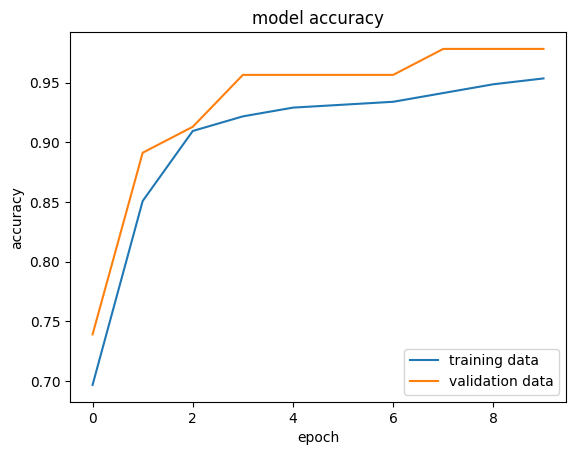

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

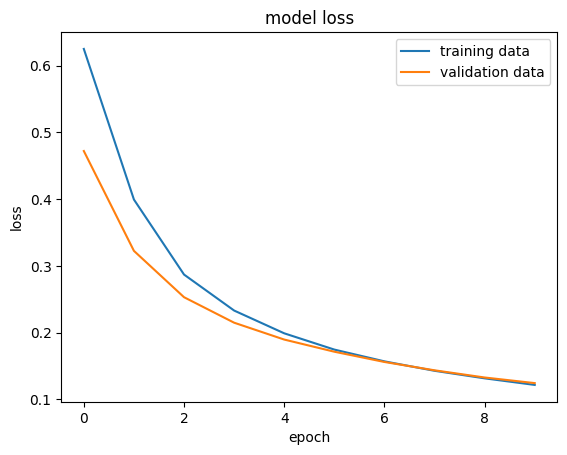

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

#### Accuracy of the model on test data

In [33]:
loss, accuracy = model.evaluate(x_test_std, y_test)
print(accuracy)

4/4 [==============================] - 0s 5ms/step - loss: 0.1285 - accuracy: 0.9649
0.9649122953414917


In [34]:
print(x_test_std.shape)
print(x_test_std[0])

(114, 28)
[-0.04462793 -1.41612656  2.0202457  -0.11323672  0.18500609  0.47102419
  0.63336386  0.26335737  0.53209124  2.62763999  0.62351167  0.11405261
  1.01246781  0.41126289  0.63848593  2.88971815 -0.41675911  0.74270853
 -0.32983699 -1.67435595 -0.36854552 -0.38767294  0.32655007 -0.74858917
 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [35]:
Y_pred = model.predict(x_test_std)

4/4 [==============================] - 0s 4ms/step


In [36]:
print(Y_pred.shape)
print(Y_pred[0])

(114, 2)
[0.39677116 0.8293595 ]


In [37]:
print(x_test_std)

[[-0.04462793 -1.41612656  2.0202457  ... -0.18278004 -1.23064515
  -0.6268286 ]
 [ 0.24583601 -0.06219797 -0.42922355 ...  0.54129749  0.11047691
   0.0483572 ]
 [-1.26115925 -0.29051645 -0.90745995 ... -1.35138617  0.269338
  -0.28231213]
 ...
 [ 0.72709489  0.45836817  1.12838046 ...  1.46701686  1.19909344
   0.65319961]
 [ 0.25437907  1.33054477 -0.1518324  ... -1.29043534 -2.22561725
  -1.59557344]
 [ 0.84100232 -0.06676434  1.26883168 ...  2.15137705  0.35629355
   0.37459546]]


In [38]:
print(Y_pred)

[[0.39677116 0.8293595 ]
 [0.55365694 0.6264791 ]
 [0.08171607 0.92112124]
 [0.9973329  0.06247488]
 [0.48917308 0.7292864 ]
 [0.99468726 0.09510029]
 [0.33533457 0.6904292 ]
 [0.11547785 0.97730005]
 [0.23769255 0.9234542 ]
 [0.19872048 0.9654072 ]
 [0.43070582 0.59458953]
 [0.1187661  0.71569145]
 [0.24427457 0.8090339 ]
 [0.31351855 0.7337357 ]
 [0.13860005 0.9250119 ]
 [0.85486084 0.45991117]
 [0.11328751 0.9300071 ]
 [0.20223054 0.9049487 ]
 [0.20503339 0.95687973]
 [0.9854061  0.10551841]
 [0.8382023  0.99918485]
 [0.15258339 0.9431309 ]
 [0.18765822 0.92702633]
 [0.15121192 0.9712827 ]
 [0.26938546 0.86604387]
 [0.9569386  0.288644  ]
 [0.27426687 0.87348276]
 [0.60125464 0.9038223 ]
 [0.93350476 0.35413107]
 [0.9497927  0.2622291 ]
 [0.23430018 0.9393076 ]
 [0.23026653 0.87995374]
 [0.19744146 0.9464547 ]
 [0.99872005 0.04367018]
 [0.93682665 0.21141578]
 [0.3497763  0.8675657 ]
 [0.11119179 0.97616756]
 [0.37006995 0.84773135]
 [0.09182798 0.9298855 ]
 [0.1789138  0.86956775]


model.predict() gives the prediction probability of each class for that data point